In [1]:
#Library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
import os

In [2]:
# Load the ml-latest-small.zip
movielens_zipped_file = "ml-latest-small.zip"
keras_datasets_path = Path(movielens_zipped_file).parents[0]
movielens_dir = keras_datasets_path / "ml-latest-small"

In [3]:
# Only extract the data the first time the script is run.
if not movielens_dir.exists():
    with ZipFile(movielens_zipped_file, "r") as zip:
        # Extract files
        print("Extracting all the files now...")
        # Unzip the ml-latest-small.zip
        zip.extractall(path=keras_datasets_path)
        print("Done!")

In [4]:
# Get all the files inside the movielens_dir folder
os.listdir(movielens_dir)

['links.csv', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']

In [5]:
# Create dataframe of ratings_file variable using ratings.csv
ratings_file = movielens_dir / "ratings.csv"
df = pd.read_csv(ratings_file)
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
# Check missing values of ratings dataframe
df_missing_values_count = df.isnull().sum()
df_missing_values_count

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
"""
Find all unique userId and give them an encoding value. 
This value will tell wich row of recommendation matrix is each user
"""

# Return unique value for in userID and save it to user_ids
user_ids = df["userId"].unique().tolist()
user_ids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [8]:
# Encode user id as integer indices
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user2user_encoded

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [9]:
# From integer indices to user id
userencoded2user = {i: x for i, x in enumerate(user_ids)}
userencoded2user

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 14,
 14: 15,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 21,
 21: 22,
 22: 23,
 23: 24,
 24: 25,
 25: 26,
 26: 27,
 27: 28,
 28: 29,
 29: 30,
 30: 31,
 31: 32,
 32: 33,
 33: 34,
 34: 35,
 35: 36,
 36: 37,
 37: 38,
 38: 39,
 39: 40,
 40: 41,
 41: 42,
 42: 43,
 43: 44,
 44: 45,
 45: 46,
 46: 47,
 47: 48,
 48: 49,
 49: 50,
 50: 51,
 51: 52,
 52: 53,
 53: 54,
 54: 55,
 55: 56,
 56: 57,
 57: 58,
 58: 59,
 59: 60,
 60: 61,
 61: 62,
 62: 63,
 63: 64,
 64: 65,
 65: 66,
 66: 67,
 67: 68,
 68: 69,
 69: 70,
 70: 71,
 71: 72,
 72: 73,
 73: 74,
 74: 75,
 75: 76,
 76: 77,
 77: 78,
 78: 79,
 79: 80,
 80: 81,
 81: 82,
 82: 83,
 83: 84,
 84: 85,
 85: 86,
 86: 87,
 87: 88,
 88: 89,
 89: 90,
 90: 91,
 91: 92,
 92: 93,
 93: 94,
 94: 95,
 95: 96,
 96: 97,
 97: 98,
 98: 99,
 99: 100,
 100: 101,
 101: 102,
 102: 103,
 103: 104,
 104: 105,
 105: 106,
 106: 107,
 107: 108,
 108: 109,
 109: 110,
 110: 11

In [10]:
"""
Find all unique movieId and give them an encoding value. 
This value will tell wich row of recommendation matrix is each movie
"""

# Return unique value for in movieID and save it to movie_ids
movie_ids = df["movieId"].unique().tolist()
movie_ids

[1,
 3,
 6,
 47,
 50,
 70,
 101,
 110,
 151,
 157,
 163,
 216,
 223,
 231,
 235,
 260,
 296,
 316,
 333,
 349,
 356,
 362,
 367,
 423,
 441,
 457,
 480,
 500,
 527,
 543,
 552,
 553,
 590,
 592,
 593,
 596,
 608,
 648,
 661,
 673,
 733,
 736,
 780,
 804,
 919,
 923,
 940,
 943,
 954,
 1009,
 1023,
 1024,
 1025,
 1029,
 1030,
 1031,
 1032,
 1042,
 1049,
 1060,
 1073,
 1080,
 1089,
 1090,
 1092,
 1097,
 1127,
 1136,
 1196,
 1197,
 1198,
 1206,
 1208,
 1210,
 1213,
 1214,
 1219,
 1220,
 1222,
 1224,
 1226,
 1240,
 1256,
 1258,
 1265,
 1270,
 1275,
 1278,
 1282,
 1291,
 1298,
 1348,
 1377,
 1396,
 1408,
 1445,
 1473,
 1500,
 1517,
 1552,
 1573,
 1580,
 1587,
 1617,
 1620,
 1625,
 1644,
 1676,
 1732,
 1777,
 1793,
 1804,
 1805,
 1920,
 1927,
 1954,
 1967,
 2000,
 2005,
 2012,
 2018,
 2028,
 2033,
 2046,
 2048,
 2054,
 2058,
 2078,
 2090,
 2093,
 2094,
 2096,
 2099,
 2105,
 2115,
 2116,
 2137,
 2139,
 2141,
 2143,
 2161,
 2174,
 2193,
 2253,
 2268,
 2273,
 2291,
 2329,
 2338,
 2353,
 2366,
 

In [11]:
# Encode movie id as integer indices
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie2movie_encoded

{1: 0,
 3: 1,
 6: 2,
 47: 3,
 50: 4,
 70: 5,
 101: 6,
 110: 7,
 151: 8,
 157: 9,
 163: 10,
 216: 11,
 223: 12,
 231: 13,
 235: 14,
 260: 15,
 296: 16,
 316: 17,
 333: 18,
 349: 19,
 356: 20,
 362: 21,
 367: 22,
 423: 23,
 441: 24,
 457: 25,
 480: 26,
 500: 27,
 527: 28,
 543: 29,
 552: 30,
 553: 31,
 590: 32,
 592: 33,
 593: 34,
 596: 35,
 608: 36,
 648: 37,
 661: 38,
 673: 39,
 733: 40,
 736: 41,
 780: 42,
 804: 43,
 919: 44,
 923: 45,
 940: 46,
 943: 47,
 954: 48,
 1009: 49,
 1023: 50,
 1024: 51,
 1025: 52,
 1029: 53,
 1030: 54,
 1031: 55,
 1032: 56,
 1042: 57,
 1049: 58,
 1060: 59,
 1073: 60,
 1080: 61,
 1089: 62,
 1090: 63,
 1092: 64,
 1097: 65,
 1127: 66,
 1136: 67,
 1196: 68,
 1197: 69,
 1198: 70,
 1206: 71,
 1208: 72,
 1210: 73,
 1213: 74,
 1214: 75,
 1219: 76,
 1220: 77,
 1222: 78,
 1224: 79,
 1226: 80,
 1240: 81,
 1256: 82,
 1258: 83,
 1265: 84,
 1270: 85,
 1275: 86,
 1278: 87,
 1282: 88,
 1291: 89,
 1298: 90,
 1348: 91,
 1377: 92,
 1396: 93,
 1408: 94,
 1445: 95,
 1473: 96,
 

In [12]:
# From integer indices to movie id
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
movie_encoded2movie

{0: 1,
 1: 3,
 2: 6,
 3: 47,
 4: 50,
 5: 70,
 6: 101,
 7: 110,
 8: 151,
 9: 157,
 10: 163,
 11: 216,
 12: 223,
 13: 231,
 14: 235,
 15: 260,
 16: 296,
 17: 316,
 18: 333,
 19: 349,
 20: 356,
 21: 362,
 22: 367,
 23: 423,
 24: 441,
 25: 457,
 26: 480,
 27: 500,
 28: 527,
 29: 543,
 30: 552,
 31: 553,
 32: 590,
 33: 592,
 34: 593,
 35: 596,
 36: 608,
 37: 648,
 38: 661,
 39: 673,
 40: 733,
 41: 736,
 42: 780,
 43: 804,
 44: 919,
 45: 923,
 46: 940,
 47: 943,
 48: 954,
 49: 1009,
 50: 1023,
 51: 1024,
 52: 1025,
 53: 1029,
 54: 1030,
 55: 1031,
 56: 1032,
 57: 1042,
 58: 1049,
 59: 1060,
 60: 1073,
 61: 1080,
 62: 1089,
 63: 1090,
 64: 1092,
 65: 1097,
 66: 1127,
 67: 1136,
 68: 1196,
 69: 1197,
 70: 1198,
 71: 1206,
 72: 1208,
 73: 1210,
 74: 1213,
 75: 1214,
 76: 1219,
 77: 1220,
 78: 1222,
 79: 1224,
 80: 1226,
 81: 1240,
 82: 1256,
 83: 1258,
 84: 1265,
 85: 1270,
 86: 1275,
 87: 1278,
 88: 1282,
 89: 1291,
 90: 1298,
 91: 1348,
 92: 1377,
 93: 1396,
 94: 1408,
 95: 1445,
 96: 1473,
 

In [13]:
# Map user ID to a "user vector" via an embedding matrix
df["user"] = df["userId"].map(user2user_encoded)
# Map movie ID to a "movie vector" via an embedding matrix
df["movie"] = df["movieId"].map(movie2movie_encoded)
df

,userId,movieId,rating,timestamp,user,movie
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,1
2,1,6,4.0,964982224,0,2
3,1,47,5.0,964983815,0,3
4,1,50,5.0,964982931,0,4
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,609,3120
100832,610,168248,5.0,1493850091,609,2035
100833,610,168250,5.0,1494273047,609,3121
100834,610,168252,5.0,1493846352,609,1392


In [14]:
# Get the number of users
num_users = len(user2user_encoded)
# Get the number of movies
num_movies = len(movie_encoded2movie)

# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

In [15]:
#Descipriton
print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 610, Number of Movies: 9724, Min rating: 0.5, Max rating: 5.0


In [16]:
#Shuffle the order 
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


In [17]:
# Create training data based on user vector and movie vector columns
x = df[["user", "movie"]].values
x

array([[ 431, 4730],
       [ 287,  474],
       [ 598, 2631],
       ...,
       [ 479, 2240],
       [   5,  712],
       [ 102, 2046]])

In [18]:
# Create true label based on rating columns
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
y

array([0.88888889, 0.55555556, 0.55555556, ..., 0.77777778, 0.55555556,
       1.        ])

In [19]:
# Train Validation Split
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [20]:
# Embed both users and movies in to 50-dimensional vectors
EMBEDDING_SIZE = 50

# Create the model
class RecommenderNet(keras.Model):
    
    """
    RecommenderNet class is the class that has functio to create the machine learning model.
    The model is define by two embedding layers, one for the users and one for the movies.
    
    """
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        
        """
        Defines custom layer attributes, and creates layer state variables that do not depend on input shapes.
        
        Arguments:
        ------
        num_users -- Number of users
        num_movies -- Number of movies
        embedding_size -- Number of dimensional vector
        
        """
        # Reference a method on a parent class
        super(RecommenderNet, self).__init__(**kwargs)
        
        #Initialize
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        
        #Embedding layers for user
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        
        #Bias for each user
        self.user_bias = layers.Embedding(num_users, 1)
        
        # Embedding layers for movie
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        
        #Bias for each movie
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        """
        Performs the logic of applying the layer to the input tensors (which should be passed in as argument).
        Use the dot product between the user embedding layer and the movie embedding layer.
        The result of the dot product will be added with user bias and movie bias.
        
        Arguments: 
        -------
        inputs -- Input tensors
        
        Return:
        -------
        Vector between 0 and 1 (Because there is sigmoid function)
        """
        
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)

In [21]:
#Create object model
model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

In [22]:
# Train the model based on the data split
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

2021-07-29 00:07:24.975943: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1418/1418 [==============================] - 12s 7ms/step - loss: 0.6365 - val_loss: 0.6209
Epoch 2/5
1418/1418 [==============================] - 10s 7ms/step - loss: 0.6133 - val_loss: 0.6188
Epoch 3/5
1418/1418 [==============================] - 9s 6ms/step - loss: 0.6078 - val_loss: 0.6125
Epoch 4/5
1418/1418 [==============================] - 8s 6ms/step - loss: 0.6071 - val_loss: 0.6145
Epoch 5/5
1418/1418 [==============================] - 9s 6ms/step - loss: 0.6070 - val_loss: 0.6129


In [23]:
# Settings for plot
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

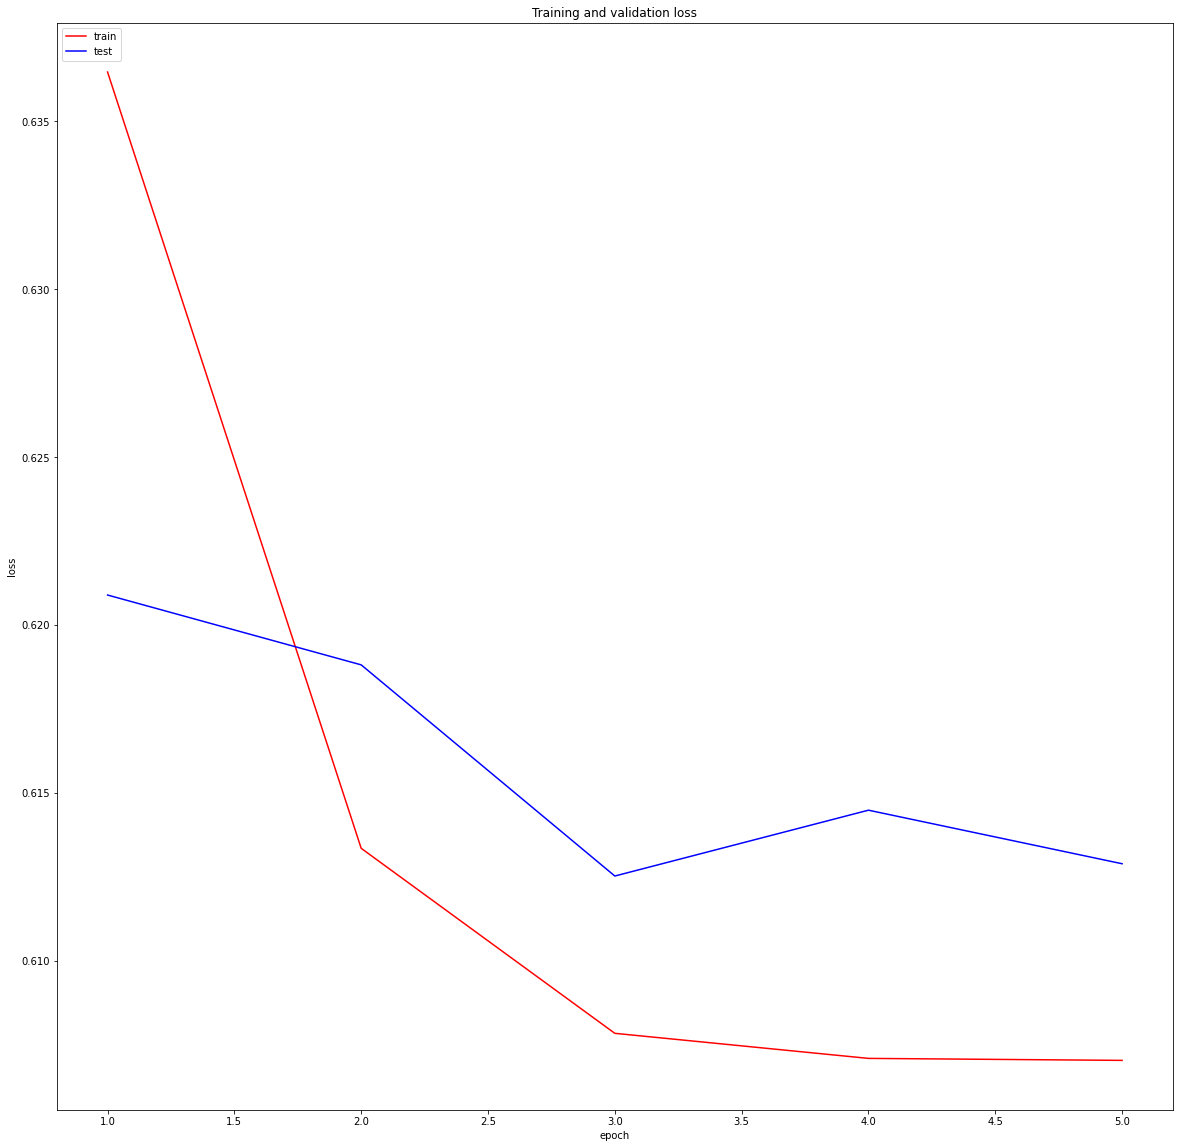

In [24]:
# Plot training and validation loss
fig = plt.figure(figsize=(20, 20))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [25]:
# Create a dataframe containt movie description from moveis.csv
movie_df = pd.read_csv(movielens_dir / "movies.csv")
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [26]:
# Check missing values of movie dataframe
movie_missing_values_count = movie_df.isnull().sum()
movie_missing_values_count

movieId    0
title      0
genres     0
dtype: int64

In [27]:
# Let us get a user randomly and see the top recommendations.
#First pick the one user randomly
user_id = df.userId.sample(1).iloc[0]
user_id

474

In [28]:
#Let us see what movies watched by that user
movies_watched_by_user = df[df.userId == user_id]
movies_watched_by_user

,userId,movieId,rating,timestamp,user,movie
73199,474,381,2.5,1087832502,473,623
74203,474,4034,4.5,1081177376,473,439
73428,474,1223,4.5,1053372016,473,1104
73239,474,586,2.0,1046886823,473,827
73756,474,2261,2.0,978576252,473,1586
...,...,...,...,...,...,...
74290,474,4465,4.0,1004131709,473,3241
73656,474,2009,3.0,1089386702,473,3022
73530,474,1466,4.0,975172958,473,363
74065,474,3424,4.0,1058208764,473,1718


In [29]:
# Let us see also movies that has not yet watched by that user
movies_not_watched = movie_df[
    ~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]
movies_not_watched

2            3
3            4
7            8
8            9
9           10
         ...  
9737    193581
9738    193583
9739    193585
9740    193587
9741    193609
Name: movieId, Length: 7634, dtype: int64

In [30]:
# Create a list of movies that has not yet watched by that user
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched

[32770,
 3,
 4,
 8,
 9,
 10,
 12,
 13,
 15,
 18,
 19,
 20,
 23,
 131098,
 30,
 32799,
 131104,
 40,
 65577,
 42,
 44,
 48,
 49,
 65585,
 65588,
 53,
 54,
 55,
 98361,
 131130,
 60,
 61,
 65596,
 63,
 64,
 65,
 66,
 65601,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 85,
 86,
 87,
 88,
 89,
 163925,
 93,
 94,
 95,
 32862,
 97,
 65631,
 99,
 163937,
 102,
 103,
 105,
 106,
 32875,
 108,
 65642,
 112,
 113,
 65651,
 117,
 118,
 119,
 121,
 123,
 32892,
 125,
 126,
 128,
 129,
 32898,
 132,
 135,
 137,
 32906,
 141,
 163981,
 144,
 145,
 146,
 147,
 148,
 149,
 32914,
 151,
 152,
 32917,
 154,
 155,
 156,
 157,
 158,
 159,
 163,
 164,
 165,
 166,
 131237,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 98491,
 193,
 194,
 98499,
 196,
 198,
 98503,
 201,
 202,
 203,
 204,
 205,
 206,
 65738,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 217,
 218,
 219,
 220,
 225,
 227,
 228,
 229,


In [31]:
# Get the encoded number or integer indices by each movies that user has not watched yet
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
movies_not_watched

[[5804],
 [1],
 [482],
 [485],
 [5017],
 [486],
 [1399],
 [488],
 [489],
 [2657],
 [492],
 [3604],
 [2163],
 [3938],
 [6914],
 [8955],
 [3939],
 [6704],
 [4192],
 [5992],
 [971],
 [1400],
 [5596],
 [4529],
 [3811],
 [3711],
 [501],
 [3679],
 [3635],
 [3940],
 [502],
 [503],
 [1290],
 [5832],
 [1401],
 [505],
 [506],
 [6684],
 [4035],
 [2663],
 [5],
 [4663],
 [5550],
 [4698],
 [5018],
 [507],
 [9348],
 [2421],
 [508],
 [6915],
 [4036],
 [5687],
 [4037],
 [509],
 [510],
 [511],
 [512],
 [4432],
 [514],
 [2431],
 [515],
 [9533],
 [5289],
 [6792],
 [5551],
 [9722],
 [517],
 [8579],
 [519],
 [296],
 [2799],
 [9349],
 [4765],
 [520],
 [521],
 [5643],
 [9411],
 [1403],
 [7421],
 [2504],
 [6019],
 [4309],
 [297],
 [298],
 [6144],
 [6446],
 [2800],
 [4875],
 [522],
 [9561],
 [6769],
 [524],
 [9723],
 [2544],
 [525],
 [526],
 [2164],
 [5552],
 [9350],
 [8591],
 [8],
 [7125],
 [6770],
 [3680],
 [5553],
 [4463],
 [9],
 [527],
 [528],
 [10],
 [3606],
 [531],
 [5290],
 [4392],
 [532],
 [5287],
 [533

In [32]:
# Get the user number encoder or integer indices
user_encoder = user2user_encoded.get(user_id)
user_encoder

473

In [33]:
# Create 2 Dimensional array contain the user and movies that has not watched yet by user number encoder 
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
user_movie_array

array([[ 473, 5804],
       [ 473,    1],
       [ 473,  482],
       ...,
       [ 473, 3870],
       [ 473, 2989],
       [ 473, 7869]])

In [34]:
# See the shape of the array.
# First column is number of examples
# Second column is number of feature (user and movie has not wacthed yet number encoder)
user_movie_array.shape

(7616, 2)

In [35]:
# Predict the ratings for movies that has not watched yet by user for recommendation using our trained model
ratings = model.predict(user_movie_array).flatten()
ratings

array([0.57801837, 0.50757074, 0.44064438, ..., 0.53836024, 0.54893136,
       0.5063566 ], dtype=float32)

In [36]:
#Filter and sort top ten highest rating for recommendation
top_ratings_indices = ratings.argsort()[-10:][::-1]
top_ratings_indices

array([6461, 2367, 1473, 5066, 1902,  136, 6360, 1112, 1519,  122])

In [37]:
#Get the movie id of top ten highest rating for user recommendation
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]
recommended_movie_ids

[58559, 4011, 2542, 78499, 3275, 98491, 57669, 1884, 68157, 176]

In [38]:
# Result of the prediction
# Show top 10 movie recommendations to a user
print("Showing recommendations for user : {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

Showing recommendations for user : 474
Movies with high ratings from user
--------------------------------
Fugitive, The (1993) : Thriller
Remains of the Day, The (1993) : Drama|Romance
West Side Story (1961) : Drama|Musical|Romance
X2: X-Men United (2003) : Action|Adventure|Sci-Fi|Thriller
Spider-Man 2 (2004) : Action|Adventure|Sci-Fi|IMAX
--------------------------------
Top 10 movie recommendations
--------------------------------
Living in Oblivion (1995) : Comedy
Fear and Loathing in Las Vegas (1998) : Adventure|Comedy|Drama
Lock, Stock & Two Smoking Barrels (1998) : Comedy|Crime|Thriller
Boondock Saints, The (2000) : Action|Crime|Drama|Thriller
Snatch (2000) : Comedy|Crime|Thriller
In Bruges (2008) : Comedy|Crime|Drama|Thriller
Dark Knight, The (2008) : Action|Crime|Drama|IMAX
Inglourious Basterds (2009) : Action|Drama|War
Toy Story 3 (2010) : Adventure|Animation|Children|Comedy|Fantasy|IMAX
Paperman (2012) : Animation|Comedy|Romance


In [39]:
#SAVE THE MODEL

# Get the local directory right now
LOCAL_DIR = os.getcwd()
LOCAL_DIR

# Versioning
version = 1
export_path = os.path.join(LOCAL_DIR, f"ai-model/model/{version}")
print('export_path = {}\\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

export_path = /Users/alvin/Documents/DUATIGA/Koanba/Movie Recommendations/ai-model/model/1\n


2021-07-29 00:08:14.633778: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/alvin/Documents/DUATIGA/Koanba/Movie Recommendations/ai-model/model/1/assets
